**Predicting Loan Outcomes using Lending Club's loan data**

***Import libraries***

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5);
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

Initialize classes and import Classification models

In [2]:
#Initializing classes
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

***Import historical loan data***

In [7]:
accept_df = pd.read_csv('accepted_2007_to_2017Q3.csv.gz', compression='gzip', parse_dates=True)
accept_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Run basic summary stats

In [8]:
accept_df.dtypes
accept_df.shape
accept_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646778e+06,1.646774e+06,1.646421e+06,1.646749e+06,1.646778e+06,...,5778.0,5778.000000,5778.0,5778.000000,4822.000000,5778.000000,5778.000000,13290.000000,13290.000000,13290.000000
mean,NaN,1.473331e+04,1.472608e+04,1.470244e+04,1.321857e+01,4.394122e+02,7.730483e+04,1.852473e+01,3.344311e-01,6.957068e+02,...,3.0,151.587664,3.0,11.108688,446.130348,11607.266805,185.757715,5389.960476,48.485745,10.579910
std,NaN,8.803698e+03,8.800813e+03,8.805917e+03,4.704294e+00,2.592256e+02,1.207276e+05,1.098422e+01,9.048755e-01,3.130254e+01,...,0.0,123.463493,0.0,10.287269,361.855546,7459.800633,199.735241,3831.509446,8.995510,8.853511
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.320000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,82.960000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.760000e+00,2.517700e+02,4.600000e+04,1.207000e+01,0.000000e+00,6.700000e+02,...,3.0,58.932500,3.0,0.000000,173.347500,5709.287500,27.100000,2488.140000,45.000000,1.000000
50%,NaN,1.260000e+04,1.260000e+04,1.250000e+04,1.274000e+01,3.770400e+02,6.500000e+04,1.789000e+01,0.000000e+00,6.900000e+02,...,3.0,118.780000,3.0,11.000000,352.635000,10130.580000,123.360000,4515.055000,45.305000,12.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.803400e+02,9.200000e+04,2.432000e+01,0.000000e+00,7.100000e+02,...,3.0,207.650000,3.0,20.000000,606.885000,15993.665000,284.692500,7307.060000,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,4.200000e+01,8.450000e+02,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [99]:
accept_df.shape

(1646801, 150)

***Data treatment***

In [10]:
#convert date fields to date
accept_df.loc[:,'earliest_cr_line'] = pd.to_datetime(accept_df.earliest_cr_line)
accept_df.loc[:,'last_pymnt_d'] = pd.to_datetime(accept_df.last_pymnt_d)
accept_df.loc[:,'last_credit_pull_d'] = pd.to_datetime(accept_df.last_credit_pull_d)
accept_df.loc[:,'issue_d'] = pd.to_datetime(accept_df.issue_d)

In [11]:
accept_df.loc[0:4,['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2014-12-01,1994-08-01,2016-06-01,2017-11-01
1,2014-12-01,1989-09-01,2016-08-01,2017-02-01
2,2014-12-01,2003-08-01,2016-05-01,2017-12-01
3,2014-12-01,2000-10-01,2017-12-01,2017-12-01
4,2014-12-01,2002-08-01,2015-08-01,2016-10-01


***Data visualization to better understand the loan portfolio***

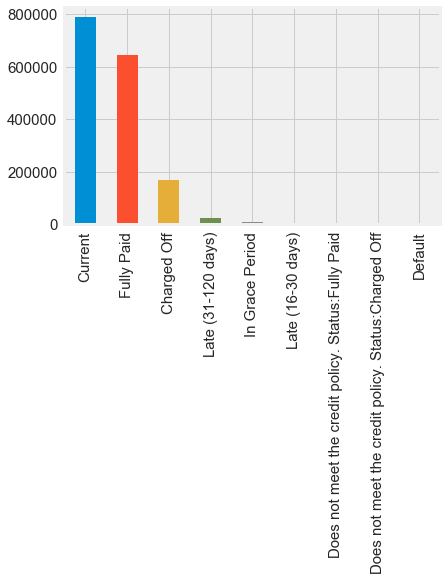

In [12]:
#Loan Status by type
ax = accept_df.loc[:,'loan_status'].value_counts().plot(kind='bar');

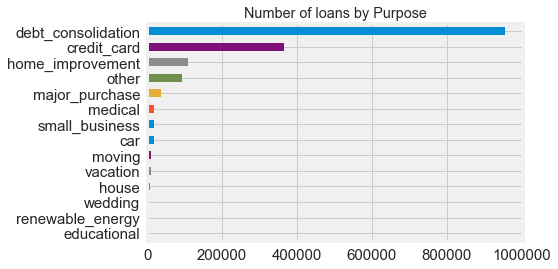

In [9]:
#Number of loans by Purpose stated on application
ax = accept_df.purpose.value_counts().sort_values().plot(kind='barh')
ax.set_title('Number of loans by Purpose');

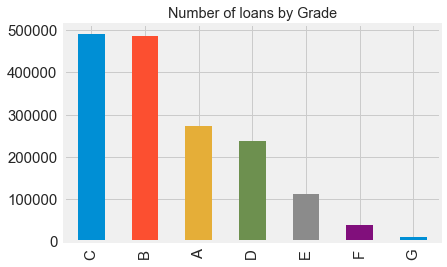

In [13]:
#Number of loans by LC-assigned Loan Grade
ax = accept_df.loc[:,'grade'].value_counts().plot(kind='bar');
ax.set_title('Number of loans by Grade');

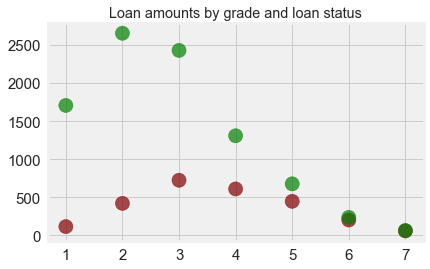

In [102]:

df = accept_df.groupby(['grade','loan_status'])['loan_amnt'].sum().reset_index()
df['loan_amnt'] = df['loan_amnt']/1000000
df.loc[:,'grade_num'] = df.loc[:,'grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F':6, 'G':7})
df1 = df.loc[df['loan_status'].isin(['Charged Off','Fully Paid']),:]

x1 = df1['grade_num']
y1 = df1['loan_amnt']
colors = df1['loan_status'].map({'Fully Paid': 'green', 'Charged Off': 'maroon'})

#area = df1['loan_amnt']

plt.scatter(x1, y1, s = 200, c=colors, alpha=0.7)
plt.xlabel = 'Grade Num'
plt.ylabel = "Total Loan Amount in $M"
plt.title("Loan amounts by grade and loan status")
plt.show();

***Analyzing only "completed" loans for model building purposes***
**Looking at "Fully Paid" and "Charged Off" loans

In [14]:
complete_loans = accept_df.loc[accept_df.loan_status.isin(['Fully Paid','Charged Off']),:]
complete_loans['loan_status'].value_counts()

Fully Paid     646902
Charged Off    168084
Name: loan_status, dtype: int64

*Assigning int to Loan Status*

In [17]:
complete_loans.loc[:,'loan_status_num'] = complete_loans.loc[:,'loan_status'].map({'Charged Off':0,'Fully Paid':1})

In [16]:
complete_loans.loc[:,'loan_status_num'].value_counts()

1    646902
0    168084
Name: loan_status_num, dtype: int64

Dropping Nan values for Debt-to-income ratio

In [18]:
complete_loans['dti'].isnull().sum()

36

In [19]:
complete_loans1 = complete_loans.dropna(subset = ['dti'])
complete_loans1['dti'].isnull().sum()

0

In [20]:
print('Shape of our complete loans dataframe\n',complete_loans1.shape)
print('Breakdown of good to bad loans\n',complete_loans1['loan_status_num'].value_counts())

Shape of our complete loans dataframe
 (814950, 151)
Breakdown of good to bad loans
 1    646872
0    168078
Name: loan_status_num, dtype: int64


Assigning int values to loan term

In [24]:
complete_loans1.loc[:,'term_num'] = complete_loans1.loc[:,'term'].map({' 36 months': 36, ' 60 months': 60})

In [22]:
complete_loans1['term_num'].isnull().sum()

0

In [23]:
complete_loans1['term_num'].value_counts()

36    618435
60    196515
Name: term_num, dtype: int64

Assign int values to home ownership type

In [25]:
complete_loans1['home_ownership'].value_counts()

MORTGAGE    406846
RENT        325057
OWN          82763
OTHER          144
ANY             94
NONE            46
Name: home_ownership, dtype: int64

In [27]:
complete_loans1.loc[:,'home_own_num'] = complete_loans1.loc[:,'home_ownership'].map({'OWN': 0, 'MORTGAGE': 1, 'RENT': 2, 'OTHER': 3, 'ANY': 3, 'NONE': 3})
complete_loans1.loc[:,'home_own_num'].value_counts()

1    406846
2    325057
0     82763
3       284
Name: home_own_num, dtype: int64

Convert employment length from string to int

In [28]:
complete_loans1['emp_length'].isnull().sum()

42217

In [31]:
complete_loans1.loc[:,'emp_length_num'] = complete_loans1.loc[:,'emp_length'].map({'< 1 year': 0,'1 year': 1,'2 years':2,'3 years':3, '4 years':4, '5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':15})
complete_loans1.loc[:,'emp_length_num'].value_counts()
complete_loans1.loc[:,'emp_length_num'].describe()
complete_loans1.loc[:,'emp_length_num'].median()

6.0

In [32]:
complete_loans1['emp_length_num'].isnull().sum()

42217

Attributing Nan to zero years of employment 

In [34]:
complete_loans1['emp_length_num'].fillna(0, inplace=True)
complete_loans1['emp_length_num'].isnull().sum()

0

Assigning int values to nan for Revolving Line Utilization Rate

In [35]:
complete_loans1['revol_util'].isnull().sum()

490

In [36]:
complete_loans1.loc[complete_loans1['revol_util'].isnull(),'tot_cur_bal'].describe()

count    4.090000e+02
mean     2.049321e+05
std      2.311538e+05
min      0.000000e+00
25%      3.907700e+04
50%      1.528360e+05
75%      2.808340e+05
max      1.921005e+06
Name: tot_cur_bal, dtype: float64

In [37]:
complete_loans1.loc[complete_loans1['revol_util'].isnull(),'tot_cur_bal'].median()

152836.0

In [38]:
complete_loans1.loc[complete_loans1['revol_util'].isnull(),'tot_hi_cred_lim'].median()

168000.0

In [49]:
#Confirm that revol util is a percentage
complete_loans1['revol_util'].describe()

count    814460.000000
mean         53.030932
std          24.320929
min           0.000000
25%          35.000000
50%          53.700000
75%          71.900000
max         892.300000
Name: revol_util, dtype: float64

**Instead of going with 0 to fill out nan values of revol_util, it makes sense to deduce a similar ratio from current outstanding balance to total credit limit**

In [39]:
#confirm that the percentages look right
df = complete_loans1.loc[complete_loans1.loc[:,'revol_util'].isnull(),'tot_cur_bal']*100/ complete_loans1.loc[complete_loans1.loc[:,'revol_util'].isnull(),'tot_hi_cred_lim']
df.describe()

count    397.000000
mean      83.181412
std       18.234539
min        0.000000
25%       76.913508
50%       87.922567
75%       94.787787
max      125.243759
dtype: float64

In [41]:
complete_loans1.loc[complete_loans1.loc[:,'revol_util'].isnull(),'revol_util'] = complete_loans1.loc[:,'tot_cur_bal']*100/complete_loans1.loc[:,'tot_hi_cred_lim']

In [42]:
complete_loans1.loc[:,'revol_util'].isnull().sum()

93

In [44]:
#df.mean()
complete_loans1.loc[complete_loans1.loc[:,'revol_util'].isnull(),'revol_util'] = df.mean()

In [45]:
complete_loans1.loc[:,'revol_util'].isnull().sum()

0

In [46]:
complete_loans1.loc[:,'revol_util'].describe()

count    814950.000000
mean         53.049060
std          24.328168
min           0.000000
25%          35.000000
50%          53.700000
75%          71.900000
max         892.300000
Name: revol_util, dtype: float64

In [47]:
complete_loans1['chargeoff_within_12_mths'].value_counts()

0.0     808663
1.0       5637
2.0        484
3.0         74
4.0         21
5.0          7
7.0          3
6.0          3
8.0          1
10.0         1
Name: chargeoff_within_12_mths, dtype: int64

In [48]:
complete_loans1['chargeoff_within_12_mths'].isnull().sum()

56

In [49]:
df = complete_loans1.loc[complete_loans1['chargeoff_within_12_mths'].isnull(),['acc_now_delinq']]
df.describe()

,acc_now_delinq
count,56.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [57]:
complete_loans1.loc[complete_loans1['chargeoff_within_12_mths'] !=0,'acc_now_delinq'].describe()

count    6231.000000
mean        0.043011
std         0.217410
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: acc_now_delinq, dtype: float64

In [59]:
complete_loans1['chargeoff_within_12_mths'].fillna(0, inplace=True)

In [60]:
complete_loans1['chargeoff_within_12_mths'].isnull().sum()

0

In [61]:
complete_loans1['chargeoff_within_12_mths'].value_counts()

0.0     808719
1.0       5637
2.0        484
3.0         74
4.0         21
5.0          7
7.0          3
6.0          3
8.0          1
10.0         1
Name: chargeoff_within_12_mths, dtype: int64

**KNN Classification Model**

In [65]:
feature_cols = ['loan_amnt','term_num','int_rate','dti','annual_inc','revol_util','fico_range_low','delinq_2yrs']
X = complete_loans1.loc[:, feature_cols]
y = complete_loans1.loc[:, 'loan_status_num']

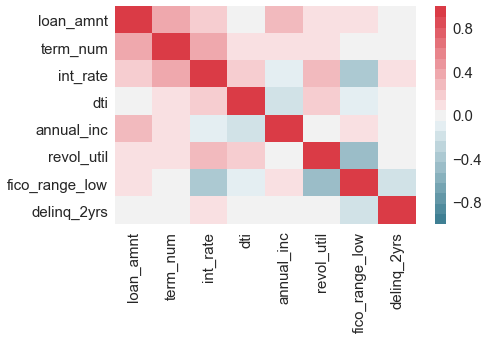

In [66]:
#snsplot to see variable dependencies
df = complete_loans1.loc[:,feature_cols]
sns.heatmap(df.corr(),
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(220,10,n=21),
            );

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)

#Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [72]:
test_accuracy = accuracy_score(y_test, y_pred_class)
test_accuracy

0.7658905064347348

In [73]:
confusion_matrix(y_test, y_pred_class)

array([[  7252,  34774],
       [ 12923, 148789]], dtype=int64)

**Creating the NULL model**

In [74]:
y_null_model = np.ones(len(y_test))
accuracy_score(y_test,y_null_model)

0.7937252746174008

In [75]:
confusion_matrix(y_test, y_null_model)

array([[     0,  42026],
       [     0, 161712]], dtype=int64)

**Optimize for K**

In [82]:

# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 150.
test_scores = []

X_train, X_test, y_train, y_test = (train_test_split(X, y, random_state=99, shuffle=True))

for k in range(1, 150):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_class)
    test_scores.append(test_accuracy)

In [101]:
scores_df = pd.DataFrame(test_scores, columns=['test_score'])

In [102]:
scores_df.sort_values('test_score', ascending=False).head()

,test_score
92,0.793760
94,0.793750
121,0.793740
100,0.793735
119,0.793730


**Run the same code for standard scaler**

In [76]:
feature_cols = ['loan_amnt','term_num','int_rate','dti','annual_inc','revol_util','fico_range_low','delinq_2yrs']
X = complete_loans1.loc[:, feature_cols]
y = complete_loans1.loc[:, 'loan_status_num']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
test_scores = []

knn = KNeighborsClassifier(n_neighbors=92)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_class)
test_scores.append(test_accuracy)

In [79]:
scores_df = pd.DataFrame(test_scores, columns=['test_score'])

In [80]:
scores_df.sort_values('test_score', ascending=False).head()

,test_score
0,0.794928


In [81]:
#Running the model with the most optimized value of K
knn = KNeighborsClassifier(n_neighbors=92)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_class)
print(test_accuracy)

0.794927799428678


In [82]:
confusion_matrix(y_test, y_pred_class)

array([[  2939,  39087],
       [  2694, 159018]], dtype=int64)

**Feature Engineering**
*Amplify the effect of Charge-offs in the trailing 12 months*

In [84]:
#Squaring the charge off attribute
complete_loans1.loc[:,'charge_off_sq'] = complete_loans1.loc[:,'chargeoff_within_12_mths'] **2

In [85]:
#check for nulls
complete_loans1.loc[:,'chargeoff_within_12_mths'].isnull().sum()

0

*Adding a new variable which is calculated as (past due amount on accounts which are delinquent)/ (requested loan amount)*

In [87]:
complete_loans1.loc[:,'DQ_LoanAmt_Pct'] = complete_loans1.loc[:,'delinq_amnt']*100/complete_loans1.loc[:,'loan_amnt']

In [88]:
#check for nulls
complete_loans1.loc[:,'DQ_LoanAmt_Pct'].isnull().sum()

0

***Random Forest Classifier***

In [89]:
feature_cols = ['loan_amnt','term_num','int_rate','dti','annual_inc','revol_util','fico_range_low','delinq_2yrs','charge_off_sq','DQ_LoanAmt_Pct']
X = complete_loans1.loc[:, feature_cols]
y = complete_loans1.loc[:, 'loan_status_num']

In [90]:
#First, run the model without using Standard Scaler
rfclass = RandomForestClassifier(n_estimators=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=99)

In [91]:
rfclass.fit(X_train, y_train)

y_pred = rfclass.predict(X_test)

accuracy_score(y_test,y_pred)

0.7894256348840177

In [92]:
pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
3,dti,0.204884
5,revol_util,0.191819
2,int_rate,0.167175
4,annual_inc,0.156916
0,loan_amnt,0.142671
6,fico_range_low,0.082323
7,delinq_2yrs,0.028525
1,term_num,0.021340
8,charge_off_sq,0.002571
9,DQ_LoanAmt_Pct,0.001776


In [93]:
confusion_matrix(y_test, y_pred)

array([[  4915,  37111],
       [  5791, 155921]], dtype=int64)

In [94]:
confusion_matrix(y_test, y_null_model)

array([[     0,  42026],
       [     0, 161712]], dtype=int64)

In [95]:
#Applying Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
rfclass.fit(X_train, y_train)

y_pred = rfclass.predict(X_test)

accuracy_score(y_test,y_pred)

0.7894354514130894

In [97]:
pd.DataFrame({'feature':feature_cols, 'importance':rfclass.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
3,dti,0.204884
5,revol_util,0.191819
2,int_rate,0.167175
4,annual_inc,0.156916
0,loan_amnt,0.142671
6,fico_range_low,0.082323
7,delinq_2yrs,0.028525
1,term_num,0.021340
8,charge_off_sq,0.002571
9,DQ_LoanAmt_Pct,0.001776


In [98]:
confusion_matrix(y_test, y_pred)

array([[  4902,  37124],
       [  5776, 155936]], dtype=int64)